# Data Mining Term Project

## Student: Haojin Liao

## ID: 1001778275

## Demo Link: [http://liaohaojin.pythonanywhere.com/](http://liaohaojin.pythonanywhere.com/)

## Github Repo Link [https://github.com/YapheeetS/dm_term_project](https://github.com/YapheeetS/dm_term_project)

## Video Link [https://youtu.be/aBTan4dVh04](https://youtu.be/aBTan4dVh04)


## Environment

<font size=4>Python==3.6</font>

<font size=4>tensorflow-gpu==2.0.0</font>

<font size=4>scikit-learn==0.22.1</font>

<font size=4>nltk==3.4.5</font>

<font size=4>matplotlib==3.1.3</font>

## Introduction

<font size=4>The task of the project is to predict the rating given a review. The datasets is the game reviews users posted on boardgamegeek, the world's largest board game site. This is actually a natural laguage process task and it contains the flowing steps: data collection, data preprocessing, training an algorithm, evaluate the algorithm, use the model to deploy a demo.</font>

## Data collection

<font size=4>The datasets from './boardgamegeek-reviews/bgg-13m-reviews.csv' contains six columns(index, user, rating, comment, ID, name). But only two columns will be used for this task which is rating and comment. After this two columns are chosen, there are still some NaNs in the datasets.</font>

In [3]:
import pandas as pd

data_frame = pd.read_csv('./boardgamegeek-reviews/bgg-13m-reviews.csv', index_col=0)
data_frame.drop(data_frame.columns[4], axis=1, inplace=True)
data_frame.drop(data_frame.columns[3], axis=1, inplace=True)
data_frame.drop(data_frame.columns[0], axis=1, inplace=True)
data_frame.head()

/home/haojin/anaconda3/envs/tf2/lib/python3.6/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,rating,comment
0,10.0,NaN
1,10.0,NaN
2,10.0,"Currently, this sits on my list as my favorite..."
3,10.0,"I know it says how many plays, but many, many ..."
4,10.0,NaN


<font size=4>The rows which contains NaN should be removed from the datasets</font>

In [4]:
data_frame = data_frame[~data_frame.comment.str.contains("NaN",na=True)]
print(data_frame.head())
print('data shape: ', data_frame.shape)

    rating                                            comment
2     10.0  Currently, this sits on my list as my favorite...
3     10.0  I know it says how many plays, but many, many ...
7     10.0           i will never tire of this game.. Awesome
11    10.0  This is probably the best game I ever played. ...
16    10.0  Fantastic game. Got me hooked on games all ove...
data shape:  (2637755, 2)


## Data Analysis

<font size=4>The task is considered to be a classification task, so the rating is rounded and there are only 11 numbers of the rating which is from zero to ten. Most of the ratings concentrate from 6 to 8 and there are only 11 zero ratings.</font>

In [5]:
data_frame["rating"] = data_frame["rating"].round(0).astype(int)
data_frame.groupby(["rating"]).count()

,comment
rating,
0,11
1,20086
2,40766
3,70974
4,136564
5,217766
6,526481
7,574586
8,657581


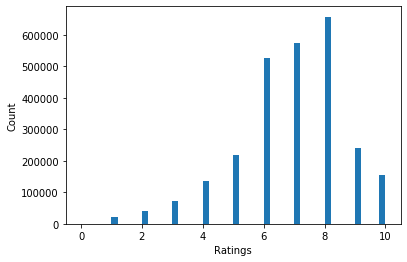

In [7]:
import matplotlib.pyplot as plt
plt.hist(data_frame.rating, 50)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()


## Data preprocess

### Raw data
<font size=4>There are 2637755 rows with 2 columns(comments and rating) in the datasets which is divided into 11 classes from 0 to 10. Each class contains diffrent numbers of datasets</font>

### Normalization
<font size=4>The first step is to uniform text format to lower-case. For example, From the perspective of machine learning algorithms, it is hard to distinguish between 'Car' / 'car' / 'CAR', but they all mean the same thing. Therefore, I generally convert all letters in the text to lowercase, and each word is represented by a unique word.</font>

### Tokenization
<font size=4>Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation.Word_tokenize() function is a wrapper function that calls tokenize() on an instance of the TreebankWordTokenizer class.</font>

### Stop Word
<font size=4>Stop Words means that in information searching, useless words are automatically filtered out before processing of natural language data(or text) in order to save storage space and improve search efficiency.These words are called Stop Words. These stop words are manually input, non-automatically generated. The nltk is used to help to find the stop words. </font>

### Remove punctuation
<font size=4>The punctuation should be removed because they usually do not have meaning.</font>

### Stemming
<font size=4>This is a word stemmer based on the Porter stemming algorithm which can extract the stem of word. Remove useless information from words. Reduce the size of the corpus. For example, 'branching' / 'branched' / 'branches' can be restored to 'branch'. They all express the meaning of dividing into multiple routes or branches. This helps reduce complexity while retaining the basic meaning of the words. Stemming is done with very simple search and replace style rules.Stemming sometimes generates stems that are not complete English words. But as long as all forms of the word are reduced to the same stem. So they all have a common underlying meaning.</font>


In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import string
from tqdm import tqdm
import numpy as np
import random
nltk.download('punkt')
nltk.download('stopwords')

x = np.array(data_frame.comment)
y = np.array(data_frame.rating)
y = np.round(y)

all_texts = []
for index, text in tqdm(enumerate(x)):
    # lower case
    text = text.lower()
    # tokenize
    words = word_tokenize(text)
    # topwords
    words = [w for w in words if w not in stopwords.words('english')]
    # remove punctuation
    words = [w for w in words if w not in string.punctuation]
    # Stemming
    words = [PorterStemmer().stem(w) for w in words]
    all_texts.append(words)

x = np.array(all_texts)
index = [i for i in range(len(x))]
random.shuffle(index)
x = x[index]
y = y[index]

np.save('x.npy', x)
np.save('y.npy', y)


[nltk_data] Downloading package punkt to /home/haojin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/haojin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2637755it [3:28:47, 210.55it/s]


## Training an algorithm

<font size=4>Before starting, The dataset is first devided into train data and test data. Then TF-IDF is used to assign a weight to each word. To assess the importance of a word to a document set or a document in a corpus. The importance of a word increases in proportion to the number of times it appears in the document.</font>

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
import sklearn.metrics as metrics
import numpy as np
from tqdm import tqdm

print('load data')

x = np.load('x.npy', allow_pickle=True)
y = np.load('y.npy', allow_pickle=True)

for i, d in tqdm(enumerate(x)):
    sentence = ' '.join(x[i])
    x[i] = sentence
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


count_vect = CountVectorizer(min_df=0.001, max_df=0.5, max_features=1000)
X_train_counts = count_vect.fit_transform(x_train)
X_test_counts = count_vect.fit_transform(x_test)

count_vect = TfidfTransformer()
tf_transformer = TfidfTransformer().fit(X_train_counts)
x_train = tf_transformer.transform(X_train_counts)
x_train = x_train.toarray()
print(x_train.shape)

tf_transformer = TfidfTransformer().fit(X_test_counts)
x_test = tf_transformer.transform(X_test_counts)


load data


2637755it [00:06, 410167.00it/s]


(1846428, 1000)


## Decision tree

<font size=4>The decision tree function is loaded from sklearn. The parameters used here means: </font>

<font size=4>criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.</font>

<font size=4>max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.</font>

<font size=4>min_samples_split: The minimum number of samples required to split an internal node</font>

<font size=4>min_samples_leafint: he minimum number of samples required to be at a leaf node. </font>

In [3]:
def decision_tree(train_x, train_y, test_x, test_y):
    print('...Decision_tree...')
    clf = DecisionTreeClassifier(criterion="gini", max_depth=2, min_samples_split=20, min_samples_leaf=5).fit(train_x, train_y)
    predict_y = clf.predict(test_x)
    print('Decision tree accuracy: ', metrics.accuracy_score(test_y, predict_y))


decision_tree(x_train, y_train, x_test, y_test)

...Decision_tree...
Decision tree accuracy:  0.24917764716735308


### AdaBoost(Decision tree)

<font size=4>The AdaBoostClassifier function is loaded from sklearn. The parameters used here means:</font>

<font size=4>algorithm: The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.</font>

<font size=4>n_estimators: The maximum number of estimators at which boosting is terminated.</font>

<font size=4>learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate.</font>

In [5]:
from sklearn.ensemble import AdaBoostClassifier

def adaboost(train_x, train_y, test_x, test_y):
    print('...adaboost...')
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME.R",n_estimators=50, learning_rate=0.8).fit(train_x, train_y)
    predict_y = clf.predict(test_x)
    print('Adaboost accuracy: ', metrics.accuracy_score(test_y, predict_y))
    
adaboost(x_train, y_train, x_test, y_test)

...adaboost...
Adaboost accuracy:  0.251204622109444


### Naive Bayesian

<font size=4>The MultinomialNB function is loaded from sklearn. The parameters used here means:</font>

<font size=4>alpha: Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).</font>

In [3]:
def bayes_fit_and_predicted(train_x, train_y, test_x, test_y):
    print('...Bayes...')
    clf = MultinomialNB().fit(train_x, train_y, alpha=1.0)
    predict_y = clf.predict(test_x)
    print('Bayes accuracy: ', metrics.accuracy_score(test_y, predict_y))
    
bayes_fit_and_predicted(x_train, y_train, x_test, y_test)

...Bayes...
Bayes accuracy:  0.2666217631901856


### SVM

<font size=4>The LinearSVC function is loaded from sklearn. The parameters used here means:</font>

<font size=4>penalty: Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.</font>

<font size=4>C: Regularization parameter. The strength of the regularization is inversely proportional to C.</font>

In [4]:
def svm_fit_and_predicted(train_x, train_y, test_x, test_y, C=1.0):
    print('...SVM...')
    clf = LinearSVC(C=1.0, penalty='l2').fit(train_x, train_y)
    predict_y = clf.predict(test_x)
    print('SVM accuracy: ', metrics.accuracy_score(test_y, predict_y))

svm_fit_and_predicted(x_train, y_train, x_test, y_test)  

...SVM...
SVM accuracy:  0.26960788649951284


## Neural Networks

<font size=4>Deep learning models have achieved great achievement in text classification. The recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence.The input of the RNN model not only has x, but also the value generated by itself will be used as the next input. RNN can be seen as multiple copies of a neural network, each neural network The generated information will be passed to the next one, so the loop of the RNN can be expanded to make it easier for us to understand its chain-like characteristics.</font>

<font size=4>The model used in the flowing code is call GRU. GRU(Gate Recurrent Unit) is a type of Recurrent Neural Network (RNN). Like LSTM (Long-Short Term Memory), it is also proposed to solve the problems of long-term memory and gradient in back propagation.</font>

<font size=4>The code is running on a GPU(1080Ti) server and the tensorflow-gpu is used to accelerate the speed of training</font>

<font size=4>The accuracy is 0.345 which is better than the traditional machine learning model</font>

In [1]:
import numpy as np
import tensorflow as tf
import os
import sklearn.metrics as metrics
import datetime
from sklearn.model_selection import train_test_split

os.environ['CUDA_VISIBLE_DEVICES'] = "0"

MAX_SEQUENCE_LENGTH = 100
MAX_NUM_WORDS = 1000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

print('load data')

x = np.load('x.npy', allow_pickle=True)
y = np.load('y.npy', allow_pickle=True)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)

# {word1: index1, word2: index2}
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=MAX_SEQUENCE_LENGTH)


num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=num_words, output_dim=EMBEDDING_DIM,
                                    input_length=MAX_SEQUENCE_LENGTH))
model.add(tf.keras.layers.GRU(256, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.GRU(128))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(11, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

# model.fit(x_train, y_train, batch_size=128, epochs=10,validation_split=VALIDATION_SPLIT)
model.fit(x_train, y_train, batch_size=128, epochs=5)
x_test = tokenizer.texts_to_sequences(x_test)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=MAX_SEQUENCE_LENGTH)
# model save
model.save('gru_model.h5')

results = model.evaluate(x_test, y_test)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

load data
Found 560717 unique tokens.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          100000    
_________________________________________________________________
gru (GRU)                    (None, 100, 256)          274944    
_________________________________________________________________
dropout (Dropout)            (None, 100, 256)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               148224    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 11)                1419      
Total params: 524,587
Trainable params: 524,587
Non-trainable params: 0
____________

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Test loss: 1.639227932412452
Test accuracy: 0.34559292


## Word2vec + GRU

<font size=4>Word2vec is a two-layer neural net that processes text by “vectorizing” words. Its input is a text corpus and its output is a set of vectors: feature vectors that represent words in that corpus.</font>

<font size=4>The difference normal GRU model and Word2vec + GRU model is that the first embedding layer is different. The normal GRU model will train the embedding when training the GRU model, but the Word2vec + GRU model would pre-train the embedding layer and the pre-trained vectors is used as initial embeddings layer to be put into the GRU model</font>

In [1]:
import numpy as np
import gensim
import logging
from gensim.models import Word2Vec
from nltk import sent_tokenize, word_tokenize, pos_tag
import numpy as np
import tensorflow as tf
import os
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import multi_gpu_model
import pickle

logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

os.environ['CUDA_VISIBLE_DEVICES'] = "0"
MAX_SEQUENCE_LENGTH = 100
MAX_NUM_WORDS = 1000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2


print('load data')

x = np.load('x.npy', allow_pickle=True)
y = np.load('y.npy', allow_pickle=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# model = Word2Vec(x_train, size=100, min_count=1, window=5)
# model.save('Word2Vec2.dict')
word2vec_model = Word2Vec.load('Word2Vec2.dict')

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)

# {word1: index1, word2: index2}
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=MAX_SEQUENCE_LENGTH)


print('Preparing embedding matrix.')
# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = word2vec_model[word]
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=num_words, output_dim=EMBEDDING_DIM,
                                    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                                    mask_zero=True,
                                    input_length=MAX_SEQUENCE_LENGTH))
model.add(tf.keras.layers.GRU(256, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.GRU(128))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(11, activation='softmax'))

# print(model.layers[0])
# model.layers[0].trainable = False
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
# model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2)
model.fit(x_train, y_train, batch_size=256, epochs=3)

# model save
model.save('gru_word2vec.h5')

x_test = tokenizer.texts_to_sequences(x_test)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=MAX_SEQUENCE_LENGTH)

results = model.evaluate(x_test, y_test)
print('Test loss:', results[0])
print('Test accuracy:', results[1])


load data


2020-05-11 20:13:52,150 : INFO : loading Word2Vec object from Word2Vec2.dict
2020-05-11 20:13:52,930 : INFO : loading wv recursively from Word2Vec2.dict.wv.* with mmap=None
2020-05-11 20:13:52,931 : INFO : loading vectors from Word2Vec2.dict.wv.vectors.npy with mmap=None
2020-05-11 20:13:52,986 : INFO : setting ignored attribute vectors_norm to None
2020-05-11 20:13:52,988 : INFO : loading vocabulary recursively from Word2Vec2.dict.vocabulary.* with mmap=None
2020-05-11 20:13:52,988 : INFO : loading trainables recursively from Word2Vec2.dict.trainables.* with mmap=None
2020-05-11 20:13:52,989 : INFO : loading syn1neg from Word2Vec2.dict.trainables.syn1neg.npy with mmap=None
2020-05-11 20:13:53,044 : INFO : setting ignored attribute cum_table to None
2020-05-11 20:13:53,045 : INFO : loaded Word2Vec2.dict


Found 559906 unique tokens.
Preparing embedding matrix.


/home/haojin/anaconda3/envs/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:52: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          100000    
_________________________________________________________________
gru (GRU)                    (None, 100, 256)          274944    
_________________________________________________________________
dropout (Dropout)            (None, 100, 256)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               148224    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 11)                1419      
Total params: 524,587
Trainable params: 524,587
Non-trainable params: 0
__________________________________________________

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Test loss: 1.640248633179343
Test accuracy: 0.3454198


## Using the whole datasets to train the GRU model again and save the model for deployment

In [1]:
import numpy as np
import tensorflow as tf
import os
import sklearn.metrics as metrics
import datetime
from sklearn.model_selection import train_test_split
import pickle

os.environ['CUDA_VISIBLE_DEVICES'] = "0"

MAX_SEQUENCE_LENGTH = 100
MAX_NUM_WORDS = 1000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

print('load data')

x = np.load('x.npy', allow_pickle=True)
y = np.load('y.npy', allow_pickle=True)


# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train, y_train = x, y

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(x_train)

fn = 'tokenizer.pkl'
with open(fn, 'wb') as f:
    picklestring = pickle.dump(tokenizer, f)


x_train = tokenizer.texts_to_sequences(x_train)

# {word1: index1, word2: index2}
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=MAX_SEQUENCE_LENGTH)


num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=num_words, output_dim=EMBEDDING_DIM,
                                    input_length=MAX_SEQUENCE_LENGTH))
model.add(tf.keras.layers.GRU(256, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.GRU(128))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(11, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

# model.fit(x_train, y_train, batch_size=128, epochs=10,validation_split=VALIDATION_SPLIT)
model.fit(x_train, y_train, batch_size=128, epochs=5)
# model save
model.save('gru_model.h5')


load data
Found 712152 unique tokens.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          100000    
_________________________________________________________________
gru (GRU)                    (None, 100, 256)          274944    
_________________________________________________________________
dropout (Dropout)            (None, 100, 256)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               148224    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 11)                1419      
Total params: 524,587
Trainable params: 524,587
Non-trainable params: 0
____________

## Balanced dataset

<font size=4>After deploying the model and testing some reviews, the model often returns values from 6 to 8. There is few values such as 1,2,3. That is probably because of the unbalanced datasets</font>

<font size=4>The following code is to sample 20000 datasets from each class except 0. Because class 0 has only 11 datasets.</font>

In [2]:
import random
import numpy as np
from tqdm import tqdm
import string
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

data_frame = pd.read_csv('./boardgamegeek-reviews/bgg-13m-reviews.csv', index_col=0)
data_frame.drop(data_frame.columns[4], axis=1, inplace=True)
data_frame.drop(data_frame.columns[3], axis=1, inplace=True)
data_frame.drop(data_frame.columns[0], axis=1, inplace=True)


data_frame = data_frame[~data_frame.comment.str.contains("NaN", na=True)]
print(data_frame.head())
print('data shape: ', data_frame.shape)

data_frame["rating"] = data_frame["rating"].round(0).astype(int)
# print(data_frame.groupby(["rating"]).count())

rating_subset = data_frame[data_frame['rating'] == 1]
balance_df = rating_subset.sample(20000)

for i in range(9):
    rating_subset = data_frame[data_frame['rating'] == (i+2)]
    r = rating_subset.sample(20000)
    balance_df = balance_df.append(r)

print(balance_df.groupby(["rating"]).count())

nltk.download('punkt')
nltk.download('stopwords')

x = np.array(balance_df.comment)
y = np.array(balance_df.rating)

all_texts = []
for index, text in tqdm(enumerate(x)):
    # lower case
    text = text.lower()
    # tokenize
    words = word_tokenize(text)
    # topwords
    words = [w for w in words if w not in stopwords.words('english')]
    # remove punctuation
    words = [w for w in words if w not in string.punctuation]
    # Stemming
    words = [PorterStemmer().stem(w) for w in words]
    all_texts.append(words)

x = np.array(all_texts)
index = [i for i in range(len(x))]
random.shuffle(index)
x = x[index]
y = y[index]

np.save('balance_x.npy', x)
np.save('balance_y.npy', y)



/home/haojin/anaconda3/envs/tf2/lib/python3.6/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


    rating                                            comment
2     10.0  Currently, this sits on my list as my favorite...
3     10.0  I know it says how many plays, but many, many ...
7     10.0           i will never tire of this game.. Awesome
11    10.0  This is probably the best game I ever played. ...
16    10.0  Fantastic game. Got me hooked on games all ove...
data shape:  (2637755, 2)
        comment
rating         
1         20000
2         20000
3         20000
4         20000
5         20000
6         20000
7         20000
8         20000
9         20000
10        20000


[nltk_data] Downloading package punkt to /home/haojin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/haojin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
200000it [17:36, 189.38it/s]


## Using the balanced datasets on GRU model


In [2]:
import numpy as np
import tensorflow as tf
import os
import sklearn.metrics as metrics
import datetime
from sklearn.model_selection import train_test_split
import pickle


os.environ['CUDA_VISIBLE_DEVICES'] = "3"

MAX_SEQUENCE_LENGTH = 100
MAX_NUM_WORDS = 1000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

print('load data')

x = np.load('balance_x.npy', allow_pickle=True)
y = np.load('balance_y.npy', allow_pickle=True)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
# x_train, y_train = x, y

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(x_train)

fn = 'balance_tokenizer.pkl'
with open(fn, 'wb') as f:
    picklestring = pickle.dump(tokenizer, f)


x_train = tokenizer.texts_to_sequences(x_train)

# {word1: index1, word2: index2}
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=MAX_SEQUENCE_LENGTH)

num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=num_words, output_dim=EMBEDDING_DIM,
                                    input_length=MAX_SEQUENCE_LENGTH))
model.add(tf.keras.layers.GRU(256, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.GRU(128))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(11, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train, batch_size=128, epochs=5,validation_split=VALIDATION_SPLIT)
# model.fit(x_train, y_train, batch_size=128, epochs=5)
# model save
# model.save('balance_gru_model.h5')

x_test = tokenizer.texts_to_sequences(x_test)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=MAX_SEQUENCE_LENGTH)
results = model.evaluate(x_test, y_test)
print('Test loss:', results[0])
print('Test accuracy:', results[1])


load data
Found 98770 unique tokens.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          100000    
_________________________________________________________________
gru_2 (GRU)                  (None, 100, 256)          274944    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 256)          0         
_________________________________________________________________
gru_3 (GRU)                  (None, 128)               148224    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                1419      
Total params: 524,587
Trainable params: 524,587
Non-trainable params: 0
___________

## Result & Conclusion

<font size=4>The accuracy of GRU on unbalanced datasets is 0.345</font>

<font size=4>The accuracy of GRU on balanced datasets is 0.262</font>

<font size=4>The accuracy of GRU on unbalanced datasets is higher than the balanced datasets. The reasons are:</font>

<font size=4>1. The unbalanced datasets has more datasets than balanced datasets</font>

<font size=4>2. GRU on unbalanced datasets probably learned that giving more weight to the rating from 6-8 will get a higher score</font>

<font size=4>Both GRU on unbalanced datasets and balanced datasets have been deployed to the demo. Welcome to test!</font>